Unemployment Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
load_data=pd.read_csv(r'Unemployment_Rate_upto_11_2020.csv')

In [3]:
load_data.columns

Index(['Region', 'Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [4]:
column_mapping = {
    'Region':'States', 
    'Date':'Date',
    ' Frequency':'Frequency',
    ' Estimated Unemployment Rate (%)':'Estimate Unemployment Rate',
       ' Estimated Employed':'Estimate Employed',
       ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate',
       'Region.1':'Region', 'longitude':'longitude', 'latitude':'latitude'
}
data = load_data.rename(columns=column_mapping)
data.to_csv('data.csv', index=False)

In [5]:
data=pd.read_csv("data.csv")

In [6]:
data.columns

Index(['States', 'Date', 'Frequency', 'Estimate Unemployment Rate',
       'Estimate Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [7]:
data.head()

,States,Date,Frequency,Estimate Unemployment Rate,Estimate Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31/01/2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29/02/2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31/03/2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30/04/2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31/05/2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [8]:
data.shape

(267, 9)

In [9]:
data.describe()

,Estimate Unemployment Rate,Estimate Employed,Estimated Labour Participation Rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimate Unemployment Rate           267 non-null    float64
 4   Estimate Employed                    267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [11]:
data.isnull().sum()

States                                 0
Date                                   0
Frequency                              0
Estimate Unemployment Rate             0
Estimate Employed                      0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64

In [12]:
data.States.value_counts()

States
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [13]:
data['Date']

0       31/01/2020
1       29/02/2020
2       31/03/2020
3       30/04/2020
4       31/05/2020
          ...     
262     30/06/2020
263     31/07/2020
264     31/08/2020
265     30/09/2020
266     31/10/2020
Name: Date, Length: 267, dtype: object

In [14]:
import datetime

data["MonthInt"] = pd.to_datetime(data["Date"], infer_datetime_format=True).dt.month
data['Month'] = data['MonthInt'].apply(lambda x: datetime.date(1900, x, 1).strftime('%B'))

# Display the updated DataFrame
print(data)

             States         Date Frequency  Estimate Unemployment Rate  \
0    Andhra Pradesh   31/01/2020         M                        5.48   
1    Andhra Pradesh   29/02/2020         M                        5.83   
2    Andhra Pradesh   31/03/2020         M                        5.79   
3    Andhra Pradesh   30/04/2020         M                       20.51   
4    Andhra Pradesh   31/05/2020         M                       17.43   
..              ...          ...       ...                         ...   
262     West Bengal   30/06/2020         M                        7.29   
263     West Bengal   31/07/2020         M                        6.83   
264     West Bengal   31/08/2020         M                       14.87   
265     West Bengal   30/09/2020         M                        9.35   
266     West Bengal   31/10/2020         M                        9.98   

     Estimate Employed  Estimated Labour Participation Rate Region  longitude  \
0             16635535        

In [15]:
data.drop('MonthInt',axis=1, inplace=True)
data.head()

,States,Date,Frequency,Estimate Unemployment Rate,Estimate Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month
0,Andhra Pradesh,31/01/2020,M,5.48,16635535,41.02,South,15.9129,79.74,January
1,Andhra Pradesh,29/02/2020,M,5.83,16545652,40.90,South,15.9129,79.74,February
2,Andhra Pradesh,31/03/2020,M,5.79,15881197,39.18,South,15.9129,79.74,March
3,Andhra Pradesh,30/04/2020,M,20.51,11336911,33.10,South,15.9129,79.74,April
4,Andhra Pradesh,31/05/2020,M,17.43,12988845,36.46,South,15.9129,79.74,May


In [16]:
data.tail()

,States,Date,Frequency,Estimate Unemployment Rate,Estimate Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month
262,West Bengal,30/06/2020,M,7.29,30726310,40.39,East,22.9868,87.855,June
263,West Bengal,31/07/2020,M,6.83,35372506,46.17,East,22.9868,87.855,July
264,West Bengal,31/08/2020,M,14.87,33298644,47.48,East,22.9868,87.855,August
265,West Bengal,30/09/2020,M,9.35,35707239,47.73,East,22.9868,87.855,September
266,West Bengal,31/10/2020,M,9.98,33962549,45.63,East,22.9868,87.855,October


Correlation

<Figure size 1200x1000 with 0 Axes>

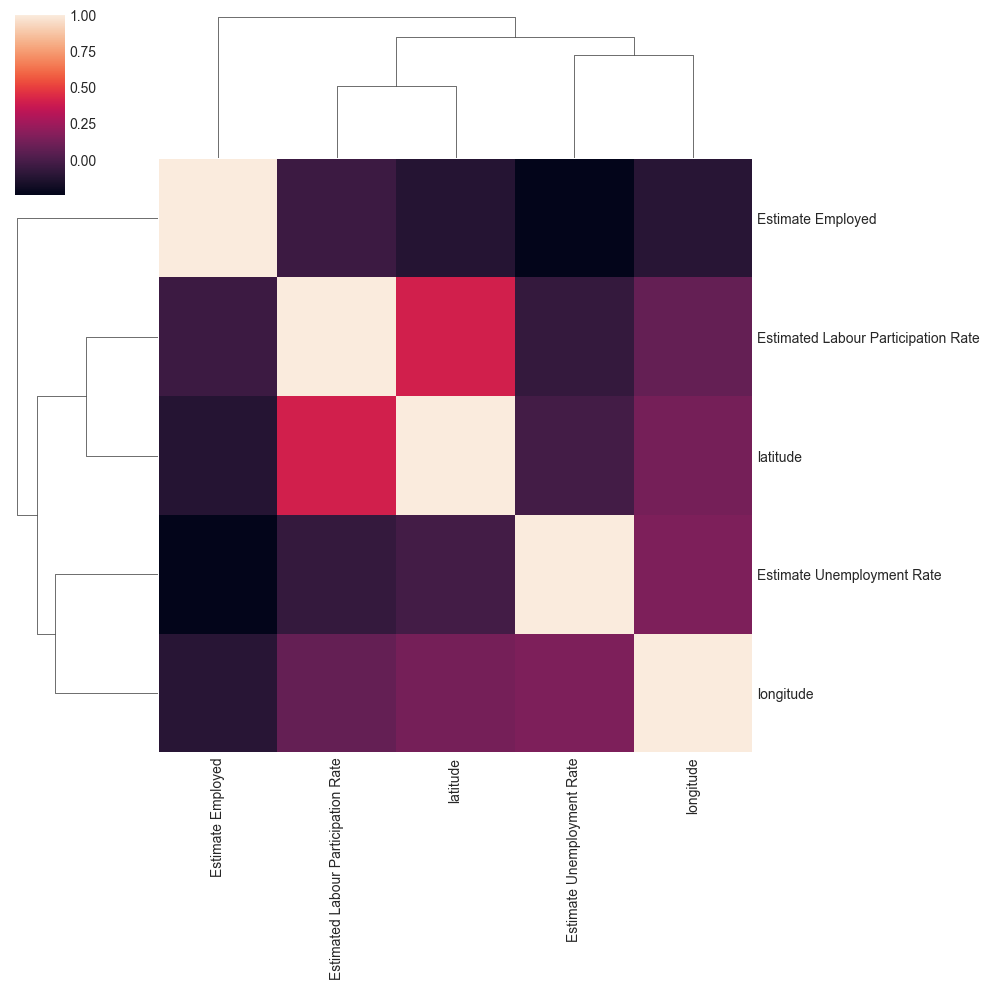

In [17]:
columns_to_drop=['States', 'Date', 'Frequency','Region','Month']
data1=data.drop(columns=columns_to_drop)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.clustermap(data1.corr())
plt.show()

Relation of all Feature with everyone

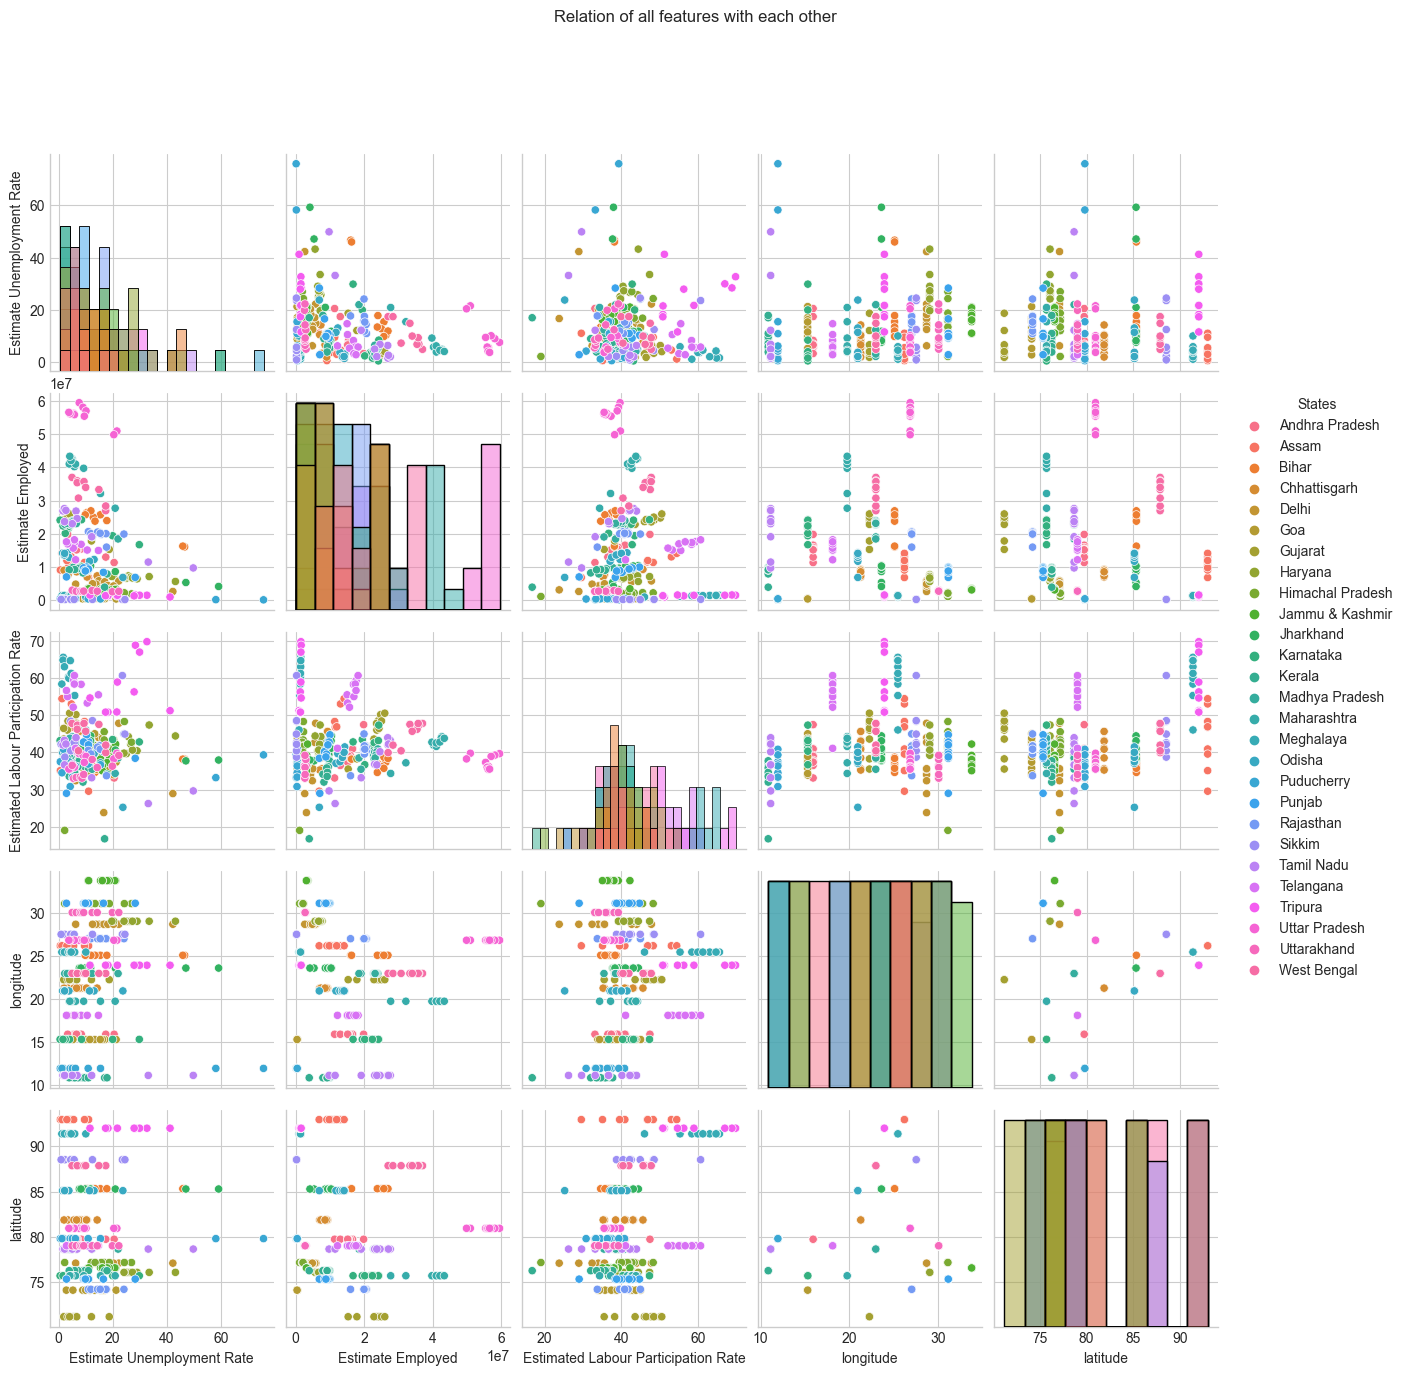

In [18]:
plot=sns.pairplot(data, hue='States',diag_kind="hist")
plot.fig.suptitle("Relation of all features with each other", y=1.1)
plt.show()

Estimate Unemployment Rate from different states

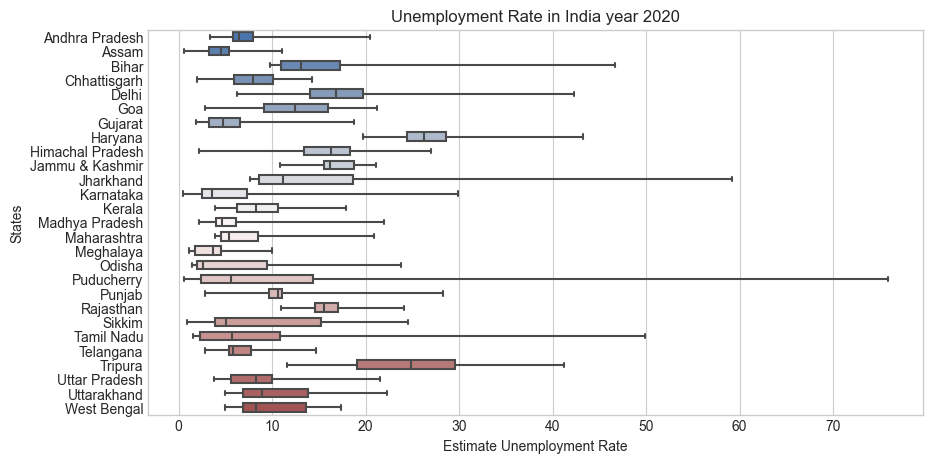

In [19]:
plt.figure(figsize=(10, 5))
plt.title("Unemployment Rate in India year 2020")

sns.boxplot(x="Estimate Unemployment Rate", y="States", data=data,
            whis=[0, 100], width=.6, palette="vlag")
plt.show()

Estimate Unemployement in different Regions

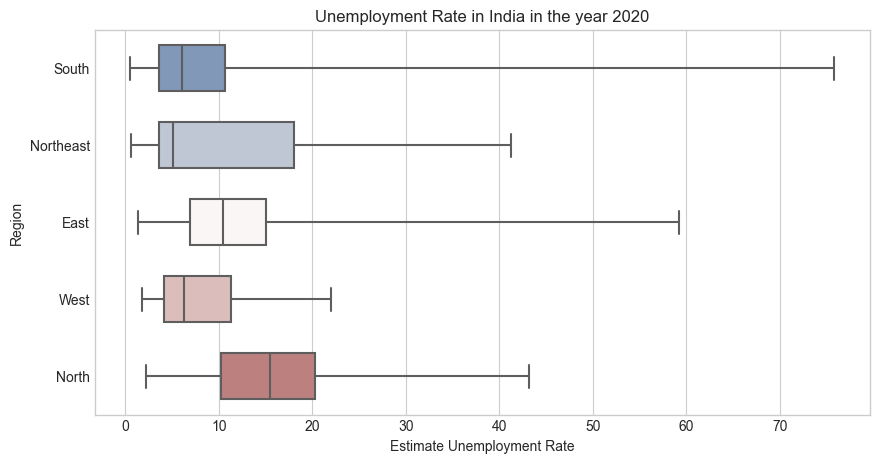

In [20]:
plt.figure(figsize=(10, 5))
plt.title("Unemployment Rate in India in the year 2020")

sns.boxplot(x="Estimate Unemployment Rate", y="Region", data=data,
            whis=[0, 100], width=.6, palette="vlag")
plt.show()

Estimate Unemployment Per Month in every Region

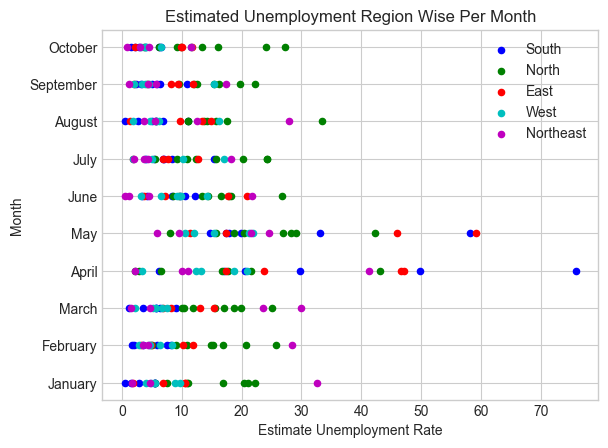

In [21]:
plot=data[data.Region=="South"].plot.scatter(x="Estimate Unemployment Rate",y="Month",color='b',label="South")
data[data.Region=="North"].plot.scatter(x="Estimate Unemployment Rate",y="Month",color='g',label="North",ax=plot)
data[data.Region=="East"].plot.scatter(x="Estimate Unemployment Rate",y="Month",color='r',label="East",ax=plot)
data[data.Region=="West"].plot.scatter(x="Estimate Unemployment Rate",y="Month",color='c',label="West",ax=plot)
data[data.Region=="Northeast"].plot.scatter(x="Estimate Unemployment Rate",y="Month",color='m',label="Northeast",ax=plot)
plt.title("Estimated Unemployment Region Wise Per Month")
plt.show()

Estimate Employed from different states

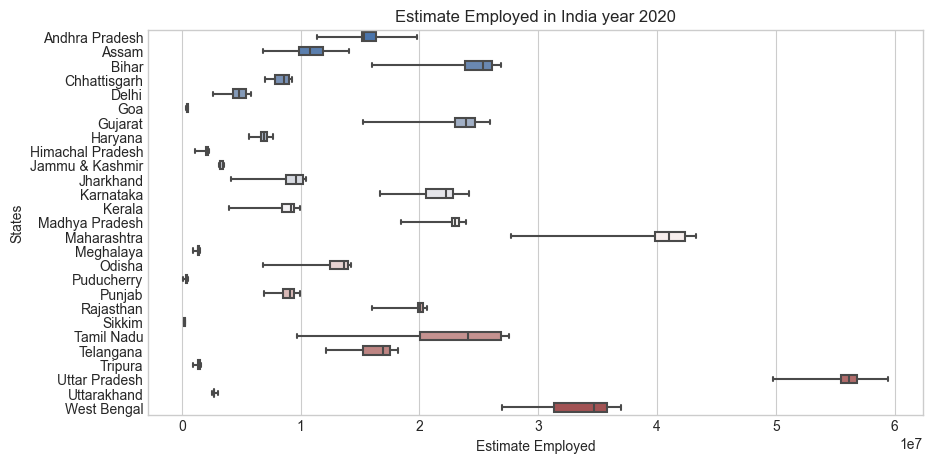

In [22]:
plt.figure(figsize=(10, 5))
plt.title("Estimate Employed in India year 2020")

sns.boxplot(x="Estimate Employed", y="States", data=data,
            whis=[0, 100], width=.6, palette="vlag")
plt.show()

Estimate Employed Region wise

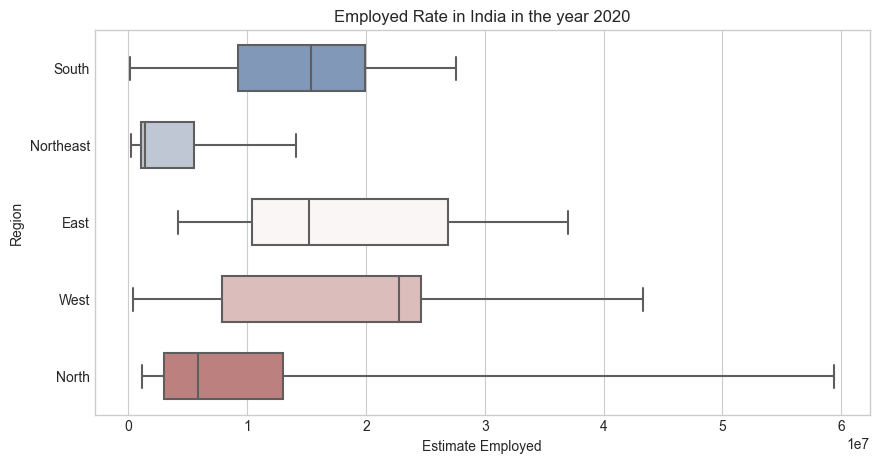

In [23]:
plt.figure(figsize=(10, 5))
plt.title("Employed Rate in India in the year 2020")

sns.boxplot(x="Estimate Employed", y="Region", data=data,
            whis=[0, 100], width=.6, palette="vlag")
plt.show()

Estimated Employed Region Wise Per Month

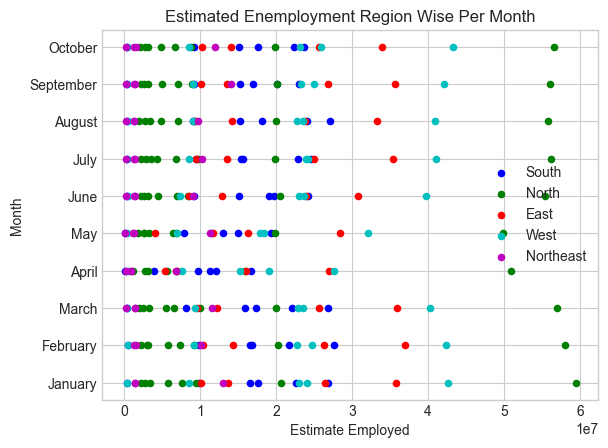

In [24]:
plot=data[data.Region=="South"].plot.scatter(x="Estimate Employed",y="Month",color='b',label="South")
data[data.Region=="North"].plot.scatter(x="Estimate Employed",y="Month",color='g',label="North",ax=plot)
data[data.Region=="East"].plot.scatter(x="Estimate Employed",y="Month",color='r',label="East",ax=plot)
data[data.Region=="West"].plot.scatter(x="Estimate Employed",y="Month",color='c',label="West",ax=plot)
data[data.Region=="Northeast"].plot.scatter(x="Estimate Employed",y="Month",color='m',label="Northeast",ax=plot)
plt.title("Estimated Enemployment Region Wise Per Month")
plt.show()

Estimate Labour participation rate

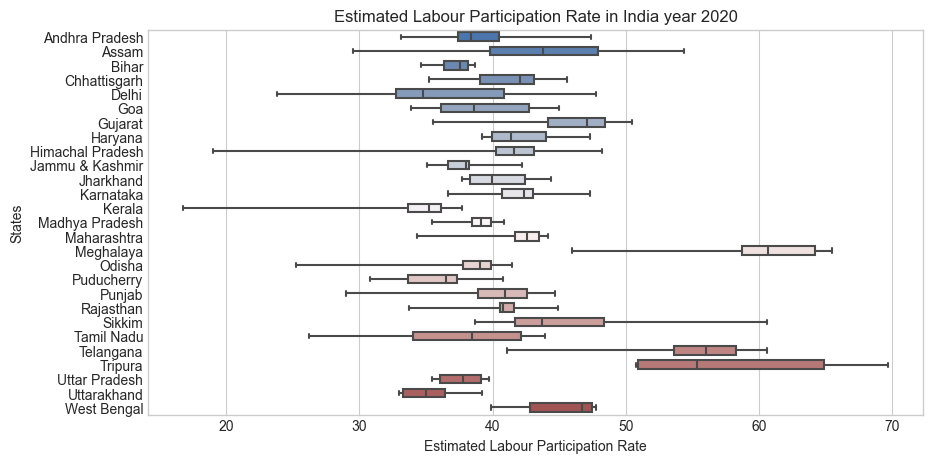

In [25]:
plt.figure(figsize=(10, 5))
plt.title("Estimated Labour Participation Rate in India year 2020")

sns.boxplot(x="Estimated Labour Participation Rate", y="States", data=data,
            whis=[0, 100], width=.6, palette="vlag")
plt.show()

Estimated Labour Participation Rate in India in the year 2020 Region Wise

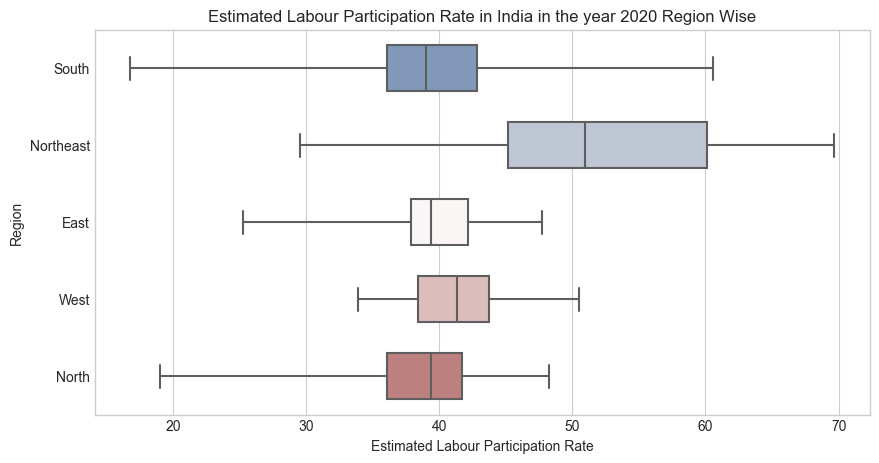

In [26]:
plt.figure(figsize=(10, 5))
plt.title("Estimated Labour Participation Rate in India in the year 2020 Region Wise")

sns.boxplot(x="Estimated Labour Participation Rate", y="Region", data=data,
            whis=[0, 100], width=.6, palette="vlag")
plt.show()

Estimated Labour Participation Rate Region wise per month

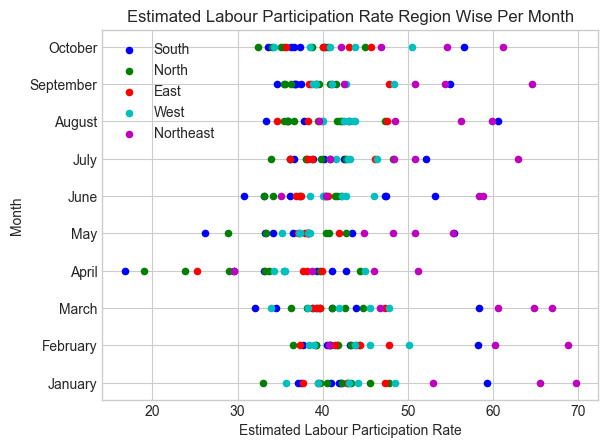

In [27]:
plot=data[data.Region=="South"].plot.scatter(x="Estimated Labour Participation Rate",y="Month",color='b',label="South")
data[data.Region=="North"].plot.scatter(x="Estimated Labour Participation Rate",y="Month",color='g',label="North",ax=plot)
data[data.Region=="East"].plot.scatter(x="Estimated Labour Participation Rate",y="Month",color='r',label="East",ax=plot)
data[data.Region=="West"].plot.scatter(x="Estimated Labour Participation Rate",y="Month",color='c',label="West",ax=plot)
data[data.Region=="Northeast"].plot.scatter(x="Estimated Labour Participation Rate",y="Month",color='m',label="Northeast",ax=plot)
plt.title("Estimated Labour Participation Rate Region Wise Per Month")
plt.show()

Estimate Labour Participation Rate Vs Estimate Unemployment Rate

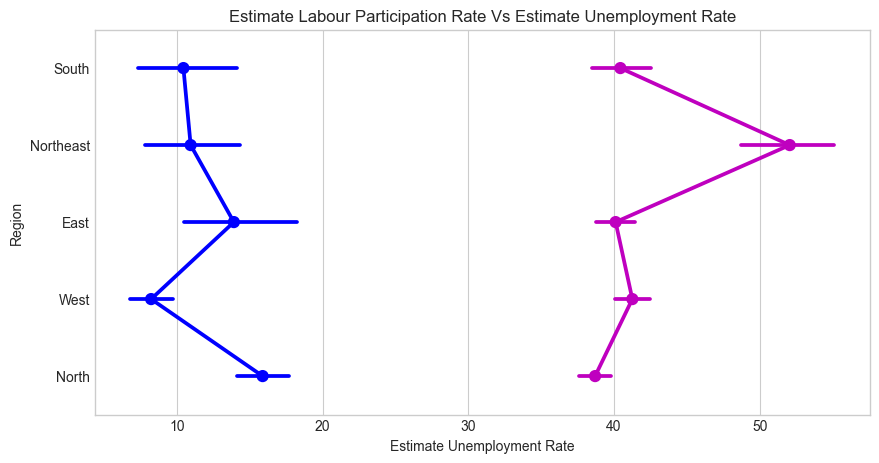

In [28]:
plt.figure(figsize=(10, 5))
plt.title("Estimate Labour Participation Rate Vs Estimate Unemployment Rate")

sns.pointplot(x="Estimated Labour Participation Rate", y="Region",data=data, color='m',label='Estimate Labour Participation Rate')
sns.pointplot(x="Estimate Unemployment Rate", y="Region", data=data, color='b',label='Estimate Unemployment Rate')
plt.show()

In [29]:
import plotly.express as px
figure = px.sunburst(data, path=["Region", "States","Month"], 
                     values="Estimate Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="Cividis", 
                     title="Summarized representation of Unemployment Rate in India")
figure.show()